## provide three hybrid image results. For one of your favorite results, show

## (a) the original and filtered images

## (b) the hybrid image and hybrid_image_scale (generated using vis_hybrid_image.m provided in the starter code)



In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# High Pass Filter

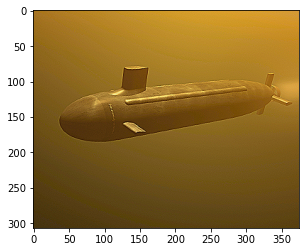

In [117]:

#read image
img_src = cv2.imread(r'M:\IIST\SEM 2\COMPUTER VISION\Lab\hw1\prob_hybrid\data\submarine.bmp')

#prepare the 5x5 shaped filter
kernel = np.array([[0.0, -1.0, 0.0], 
                   [-1.0, 5.0, -1.0],
                   [0.0, -1.0, 0.0]])


#filter the source image
img_rst_HPF = cv2.filter2D(img_src,-1,kernel)
plt.imshow(img_rst_HPF)

In [ ]:
cv2.imshow("Image",img_src)
cv2.imshow("High pass filter",img_rst_HPF)
cv2.waitKey(0)

# Low Pass Filter

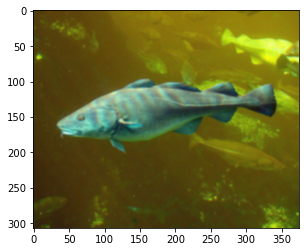

In [119]:

#read image
img_src = cv2.imread(r'M:\IIST\SEM 2\COMPUTER VISION\Lab\hw1\prob_hybrid\data\fish.bmp')

#prepare the 5x5 shaped filter
kernel = np.array([[1/9, 1/9, 1/9],[1/9 ,1/9, 1/9],[1/9 ,1/9, 1/9]])


#filter the source image
img_rst_LPF = cv2.filter2D(img_src,-1,kernel)
plt.imshow(img_rst_LPF)

In [ ]:
cv2.imshow("Image",img_src)
cv2.imshow("Low filter",img_rst_LPF)
cv2.waitKey(0)

# Hybrid image

In [120]:
dst = cv2.addWeighted(img_rst_HPF, 0.5, img_rst_LPF, 0.5, 0.0)

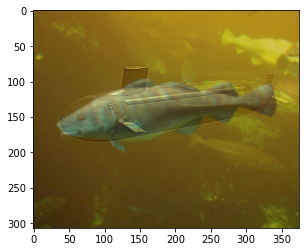

In [121]:
plt.imshow(dst)

In [11]:
cv2.imshow("High pass filter",img_rst_HPF)
cv2.imshow("Low filter",img_rst_LPF)
cv2.imshow("Bled",dst)

cv2.waitKey(0)

-1

In [13]:
cv2.imwrite('11_HPF.png',img_rst_HPF)
cv2.imwrite('12_LPF.png',img_rst_LPF)
cv2.imwrite('11_12_HYBRID.png',dst)

True

## (c) log magnitude of the Fourier transform of the two original images, the filtered images, and the hybrid image

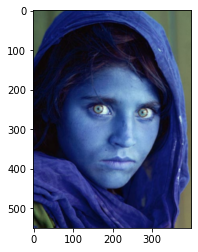

In [91]:
img = cv2.imread(r'M:\IIST\SEM 2\COMPUTER VISION\Lab\Lab 1\Hw1\Fourier Transform\8_LPF.png') # load an image
plt.imshow(img)

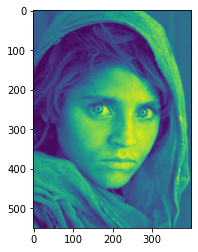

In [92]:
img = img[:,:,2] # blue channel
plt.imshow(img)

In [93]:
f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
f_shift = np.fft.fftshift(f)
f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
f_bounded = 20 * np.log(f_abs)
f_img = 255 * f_bounded / np.max(f_bounded)
f_img = f_img.astype(np.uint8)

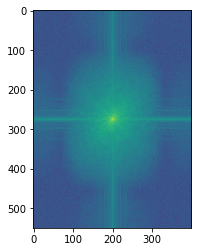

In [94]:
plt.imshow(f_bounded)

In [95]:
cv2.imwrite('8_LPF_log_FFT.png',f_bounded)

True

# Image pyramid

In [74]:
img = cv2.imread('M:\IIST\SEM 2\COMPUTER VISION\Lab\Lab 1\Hw1\Hybrid images\9_HPF.png')


In [75]:
lower_reso_1 = cv2.pyrDown(img)
lower_reso_1 = cv2.resize(lower_reso_1,(300,300), interpolation = cv2.INTER_AREA)
lower_reso_2 = cv2.pyrDown(lower_reso_1)
lower_reso_2 = cv2.resize(lower_reso_2,(300,300), interpolation = cv2.INTER_AREA)
lower_reso_3 = cv2.pyrDown(lower_reso_2)
lower_reso_3 = cv2.resize(lower_reso_3,(300,300), interpolation = cv2.INTER_AREA)

In [76]:
stack = np.hstack((img,lower_reso_1,lower_reso_2,lower_reso_3))


<function matplotlib.pyplot.show(close=None, block=None)>

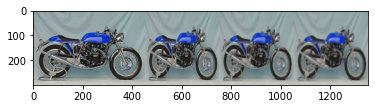

In [77]:
plt.imshow(stack)
plt.show

In [25]:
cv2.imwrite('Bike.png',img)

True

In [27]:
cv2.imwrite('Bike_ImagePyramid.png',stack)

True

# Display a Gaussian and Laplacian pyramid of level 5 (using your code). It should be formatted similar to the figure below. You may find tight_subplot.m, included in hw1.zip, to be helpful.

In [35]:

import cv2
img = cv2.imread('M:\IIST\SEM 2\COMPUTER VISION\Lab\Lab 1\Hw1\Hybrid images\9_HPF.png')
img_level_1 = cv2.pyrDown(img)
img_level_2 = cv2.pyrDown(img_level_1)

In [92]:
import cv2
# Load the image
img = cv2.imread('M:\IIST\SEM 2\COMPUTER VISION\Lab\Lab 1\Hw1\Hybrid images\9_HPF.png')
lower = img.copy()
 
# Create a Gaussian Pyramid
gaussian_pyr = [lower]
for i in range(3):
    lower = cv2.pyrDown(lower)
    gaussian_pyr.append(lower)
 
# Last level of Gaussian remains same in Laplacian
laplacian_top = gaussian_pyr[-1]
 
# Create a Laplacian Pyramid
laplacian_pyr = [laplacian_top]
for i in range(3,0,-1):
    size = (gaussian_pyr[i - 1].shape[1], gaussian_pyr[i - 1].shape[0])
    gaussian_expanded = cv2.pyrUp(gaussian_pyr[i], dstsize=size)
    laplacian = cv2.subtract(gaussian_pyr[i-1], gaussian_expanded)
    laplacian_pyr.append(laplacian)
    cv2.imshow('lap-{}'.format(i-1),laplacian)
    cv2.waitKey(0)

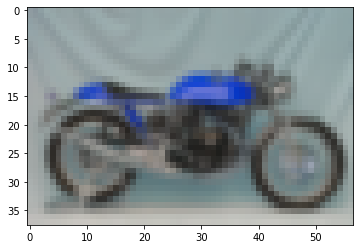

In [93]:
plt.imshow(gaussian_pyr[3])

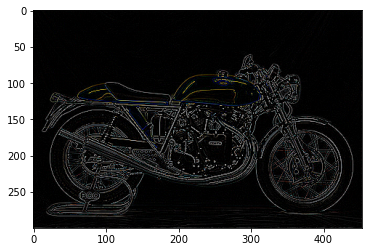

In [95]:
plt.imshow(laplacian_pyr[3])

In [96]:

laplacian_pyr[0] = cv2.resize(laplacian_pyr[0],(1600,1600), interpolation = cv2.INTER_AREA)
laplacian_pyr[1] = cv2.resize(laplacian_pyr[1],(1600,1600), interpolation = cv2.INTER_AREA)
laplacian_pyr[2] = cv2.resize(laplacian_pyr[2],(1600,1600), interpolation = cv2.INTER_AREA)
laplacian_pyr[3] = cv2.resize(laplacian_pyr[3],(1600,1600), interpolation = cv2.INTER_AREA)
stack = np.hstack((laplacian_pyr[0],laplacian_pyr[1],laplacian_pyr[2],laplacian_pyr[3]))

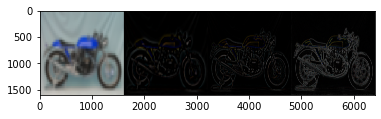

In [97]:
plt.imshow(stack)

In [56]:
cv2.imwrite('Bike_Image_Laplacian_Pyramid.png',stack)

True

# Display the FFT amplitudes of your Gaussian/Laplacian pyramids. Appropriate display ranges (using imagesc ) should be chosen so that the changes in frequency in different levels of the pyramid are clearly visible. Explain what the Laplacian and Gaussian pyramids are doing in terms of frequency.

In [ ]:
gaussian_pyr

In [112]:
gaussian_pyr_L= []
for i in range(len(laplacian_pyr)):
    img = gaussian_pyr[i][:,:,2]
    f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shift = np.fft.fftshift(f)
    f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
    f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
    f_bounded = 20 * np.log(f_abs)
    f_img = 255 * f_bounded / np.max(f_bounded)
    f_img = f_img.astype(np.uint8)
    gaussian_pyr_L.append(f_img)

In [114]:

gaussian_pyr_L[0] = cv2.resize(gaussian_pyr_L[0],(1600,1600), interpolation = cv2.INTER_AREA)
gaussian_pyr_L[1] = cv2.resize(gaussian_pyr_L[1],(1600,1600), interpolation = cv2.INTER_AREA)
gaussian_pyr_L[2] = cv2.resize(gaussian_pyr_L[2],(1600,1600), interpolation = cv2.INTER_AREA)
gaussian_pyr_L[3] = cv2.resize(gaussian_pyr_L[3],(1600,1600), interpolation = cv2.INTER_AREA)
stack_0 = np.hstack((gaussian_pyr_L[0],gaussian_pyr_L[1],gaussian_pyr_L[2],gaussian_pyr_L[3]))

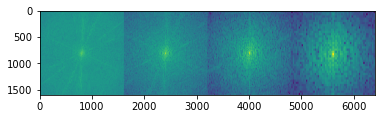

In [115]:
plt.imshow(stack_0)

In [116]:
cv2.imwrite('Bike_Image_Gaussian_Pyramid_FFT.png',stack_0)

True

# FFT on laplacian_pyr

In [102]:
laplacian_pyr_L= []
for i in range(len(laplacian_pyr)):
    img = laplacian_pyr[i][:,:,2]
    f = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    f_shift = np.fft.fftshift(f)
    f_complex = f_shift[:,:,0] + 1j*f_shift[:,:,1]
    f_abs = np.abs(f_complex) + 1 # lie between 1 and 1e6
    f_bounded = 20 * np.log(f_abs)
    f_img = 255 * f_bounded / np.max(f_bounded)
    f_img = f_img.astype(np.uint8)
    laplacian_pyr_L.append(f_img)

In [103]:
laplacian_pyr[0][:,:,2]

array([[161, 161, 161, ..., 167, 167, 167],
       [161, 161, 161, ..., 167, 167, 167],
       [161, 161, 161, ..., 167, 167, 167],
       ...,
       [188, 188, 188, ..., 187, 187, 187],
       [188, 188, 188, ..., 187, 187, 187],
       [188, 188, 188, ..., 187, 187, 187]], dtype=uint8)

In [108]:

laplacian_pyr_L[0] = cv2.resize(laplacian_pyr_L[0],(1600,1600), interpolation = cv2.INTER_AREA)
laplacian_pyr_L[1] = cv2.resize(laplacian_pyr_L[1],(1600,1600), interpolation = cv2.INTER_AREA)
laplacian_pyr_L[2] = cv2.resize(laplacian_pyr_L[2],(1600,1600), interpolation = cv2.INTER_AREA)
laplacian_pyr_L[3] = cv2.resize(laplacian_pyr_L[3],(1600,1600), interpolation = cv2.INTER_AREA)
stack_1 = np.hstack((laplacian_pyr_L[0],laplacian_pyr_L[1],laplacian_pyr_L[2],laplacian_pyr_L[3]))

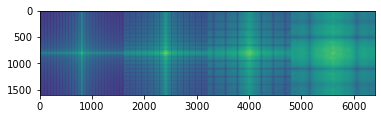

In [109]:
plt.imshow(stack_1)

In [111]:
cv2.imwrite('Bike_Image_Laplacian_Pyramid_FFT.png',stack_1)

True